In [9]:
import pandas as pd

In [10]:
ser = pd.Series(data = [1, 2, 3], index = ['A', 'B', 'C'])
print(ser)
ser[['A', 'B']]

A    1
B    2
C    3
dtype: int64


A    1
B    2
dtype: int64

In [30]:
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [49]:
d = {'one': pd.Series(['A', 'B', 'C']), 'two': pd.Series(['C', 'D'])}
df = pd.DataFrame(d)
df

,one,two
0,A,C
1,B,D
2,C,NaN


In [28]:
df['one']

0    A
1    B
Name: one, dtype: object

In [15]:
d2 = [{'one': 1, 'two': 2}, {'one': 100, 'three': 3, 'four': 4}]
df2 = pd.DataFrame(d2)

In [18]:
df2['one']

0      1
1    100
Name: one, dtype: int64

In [11]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags = tags.dropna()
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [13]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [14]:
ratings.mean()

userId       6.904587e+04
movieId      9.041567e+03
rating       3.525529e+00
timestamp    1.100918e+09
dtype: float64

In [15]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [16]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [17]:

tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

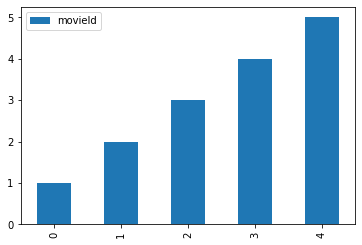

In [27]:
movies.head().plot.bar()

In [45]:
tagDict = tags['tag'].value_counts()
tagDict.head()

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
Name: tag, dtype: int64

In [52]:
moviesWithTags = movies.merge(tags, on='movieId', how='inner')
toyStoryFilter = moviesWithTags['title'] == 'Toy Story (1995)'
moviesWithTags[toyStoryFilter].head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


In [62]:
avg_raiting = ratings[['movieId', 'rating']].groupby('movieId', as_index=False).mean()
moviesWithRating = movies.merge(avg_raiting, on='movieId', how='inner')
high_rated_movies_filter = moviesWithRating['rating'] == 5
moviesWithRating[high_rated_movies_filter].head()

,movieId,title,genres,rating
9005,26718,Life On A String (Bian chang Bian Zou) (1991),Adventure|Drama|Fantasy|Musical,5.0
9557,27914,"Hijacking Catastrophe: 9/11, Fear & the Sellin...",Documentary,5.0
9857,32230,"Snow Queen, The (Lumikuningatar) (1986)",Children|Fantasy,5.0
10558,40404,Al otro lado (2004),Drama,5.0
12005,54326,"Sierra, La (2005)",Documentary,5.0
